In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [1]:
# 필요 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font',family='Hancom Gothic')

# 데이터 체크

In [9]:
bike_road = pd.read_csv('자전거도로연간현황_21년부터24년_.csv')
bike_road.head()

,행정구,2021노선수,2021노선길이,2022노선수,2022노선길이,2023노선수,2023노선길이,2024노선수,2024노선길이
0,종로구,42,31.6,43,32.1,43,32.1,44,32.0
1,중구,21,22.4,21,22.4,21,22.4,21,22.4
2,용산구,26,33.0,26,32.5,26,32.5,32,32.3
3,성동구,30,27.2,32,27.8,37,29.2,39,29.2
4,광진구,49,47.7,50,48.3,51,49.3,51,49.3


In [2]:
df_2021 = pd.read_csv('따릉이_25년데이터는없음/21년도따릉이대여이력_대여일시_행정구_대여량.csv')
df_2022 = pd.read_csv('따릉이_25년데이터는없음/2022년따릉이연도일월시대여소번호대여량.csv')
df_2023 = pd.read_csv('따릉이_25년데이터는없음/2023년따릉이연도일월시대여소번호대여량.csv')
df_2024 = pd.read_csv('따릉이_25년데이터는없음/2024년따릉이연도일월시대여소번호대여량.csv')

In [3]:
df_2021.columns = ['일시','행정구','대여량']
df_2021

,일시,행정구,대여량
0,2021-01-01-00,강남구,9
1,2021-01-01-00,강동구,12
2,2021-01-01-00,강북구,12
3,2021-01-01-00,강서구,27
4,2021-01-01-00,관악구,19
...,...,...,...
217966,2021-12-31-23,용산구,15
217967,2021-12-31-23,은평구,20
217968,2021-12-31-23,종로구,26
217969,2021-12-31-23,중구,7


In [4]:
df_2022 = df_2022[['일시','행정구','대여량']]
df_2023 = df_2023[['일시','행정구','대여량']]
df_2024 = df_2024[['일시','행정구','대여량']]

In [5]:
df_total_rent = pd.concat([df_2021,df_2022,df_2023,df_2024],axis=0)
df_total_rent

,일시,행정구,대여량
0,2021-01-01-00,강남구,9
1,2021-01-01-00,강동구,12
2,2021-01-01-00,강북구,12
3,2021-01-01-00,강서구,27
4,2021-01-01-00,관악구,19
...,...,...,...
219459,2024-12-31 23:00:00,용산구,37
219460,2024-12-31 23:00:00,은평구,35
219461,2024-12-31 23:00:00,종로구,81
219462,2024-12-31 23:00:00,중구,77


In [6]:
df_total_rent.head()

,일시,행정구,대여량
0,2021-01-01-00,강남구,9
1,2021-01-01-00,강동구,12
2,2021-01-01-00,강북구,12
3,2021-01-01-00,강서구,27
4,2021-01-01-00,관악구,19


In [7]:
del df_2021,df_2022,df_2023,df_2024

In [11]:
# 2021
df_2021_renew = pd.merge(
    df_total_rent[df_total_rent['일시'].between('2021-01-01', '2021-12-31')],
    bike_road[['2021노선길이', '행정구']].rename(columns={'2021노선길이': '노선길이'}),
    on='행정구'
)
df_2021_renew = df_2021_renew[['일시', '행정구', '노선길이', '대여량']]

# 2022
df_2022_renew = pd.merge(
    df_total_rent[df_total_rent['일시'].between('2022-01-01', '2022-12-31')],
    bike_road[['2022노선길이', '행정구']].rename(columns={'2022노선길이': '노선길이'}),
    on='행정구'
)
df_2022_renew = df_2022_renew[['일시', '행정구', '노선길이', '대여량']]

# 2023
df_2023_renew = pd.merge(
    df_total_rent[df_total_rent['일시'].between('2023-01-01', '2023-12-31')],
    bike_road[['2023노선길이', '행정구']].rename(columns={'2023노선길이': '노선길이'}),
    on='행정구'
)
df_2023_renew = df_2023_renew[['일시', '행정구', '노선길이', '대여량']]

# 2024
df_2024_renew = pd.merge(
    df_total_rent[df_total_rent['일시'].between('2024-01-01', '2024-12-31')],
    bike_road[['2024노선길이', '행정구']].rename(columns={'2024노선길이': '노선길이'}),
    on='행정구'
)
df_2024_renew = df_2024_renew[['일시', '행정구', '노선길이', '대여량']]

In [15]:
df_2024_renew

,일시,행정구,노선길이,대여량
0,2024-01-01 00:00:00,강남구,114.0,28
1,2024-01-01 01:00:00,강남구,114.0,28
2,2024-01-01 02:00:00,강남구,114.0,27
3,2024-01-01 03:00:00,강남구,114.0,33
4,2024-01-01 04:00:00,강남구,114.0,21
...,...,...,...,...
218859,2024-12-30 19:00:00,중랑구,10.0,159
218860,2024-12-30 20:00:00,중랑구,10.0,118
218861,2024-12-30 21:00:00,중랑구,10.0,122
218862,2024-12-30 22:00:00,중랑구,10.0,97


In [16]:
df_date_gu_bikeroad_rent = pd.concat([df_2021_renew,df_2022_renew,df_2023_renew,df_2024_renew],axis=0)
df_date_gu_bikeroad_rent.tail(3)

,일시,행정구,노선길이,대여량
218861,2024-12-30 21:00:00,중랑구,10.0,122
218862,2024-12-30 22:00:00,중랑구,10.0,97
218863,2024-12-30 23:00:00,중랑구,10.0,65


In [17]:
df_date_gu_bikeroad_rent.to_csv('21년부터24년행정구노선길이대여량.csv',index=False)

# 체크한 데이터 시각화

In [18]:
df_data_gu_bikeroad_rent = pd.read_csv('21년부터24년행정구노선길이대여량.csv',)
df_data_gu_bikeroad_rent

,일시,행정구,노선길이,대여량
0,2021-01-01-00,강남구,98.6,9
1,2021-01-01-01,강남구,98.6,5
2,2021-01-01-02,강남구,98.6,9
3,2021-01-01-03,강남구,98.6,7
4,2021-01-01-04,강남구,98.6,3
...,...,...,...,...
871888,2024-12-30 19:00:00,중랑구,10.0,159
871889,2024-12-30 20:00:00,중랑구,10.0,118
871890,2024-12-30 21:00:00,중랑구,10.0,122
871891,2024-12-30 22:00:00,중랑구,10.0,97


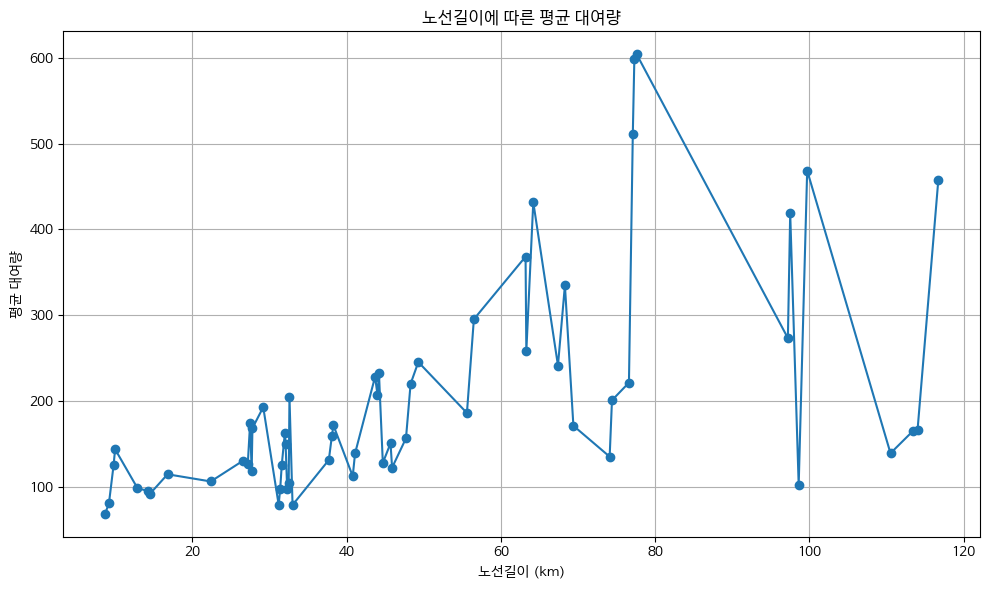

In [19]:
# plot으로 체크하기
# 데이터 준비
df = df_data_gu_bikeroad_rent.copy()
df['일시'] = df['일시'].astype(str).str[:10]
df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['일시'])

# 노선길이별 평균 대여량 계산
grouped = df.groupby('노선길이')['대여량'].mean().reset_index().sort_values('노선길이')

# 꺾은선 그래프
plt.figure(figsize=(10, 6))
plt.plot(grouped['노선길이'], grouped['대여량'], marker='o')
plt.title('노선길이에 따른 평균 대여량')
plt.xlabel('노선길이 (km)')
plt.ylabel('평균 대여량')
plt.grid(True)
plt.tight_layout()
plt.show()

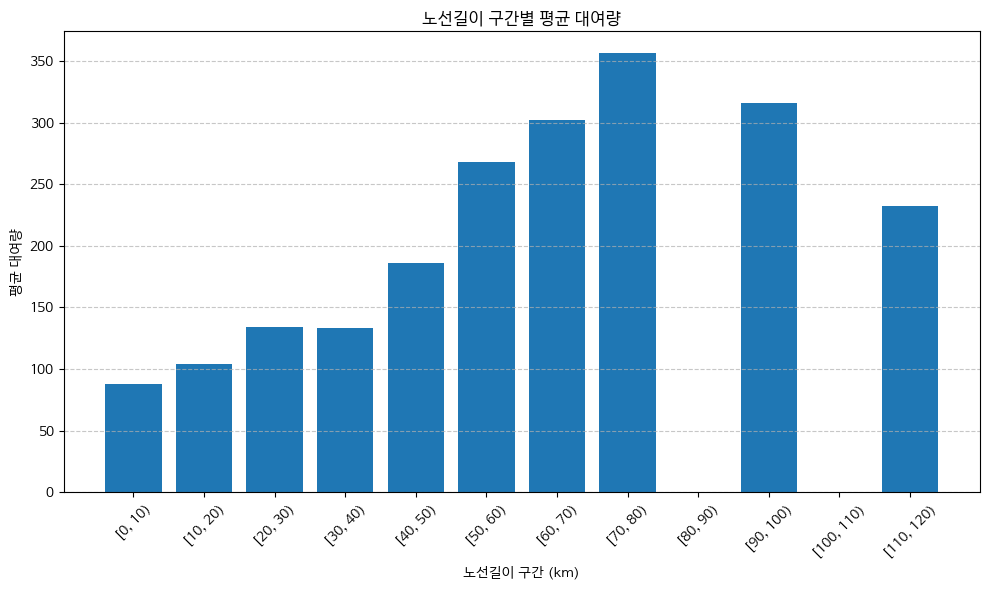

In [20]:
# hist로 체크하기
df = df_data_gu_bikeroad_rent.copy()
df['일시'] = df['일시'].astype(str).str[:10]
df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['일시'])

# 노선길이를 10km 단위 구간으로 나누기
bins = range(0, int(df['노선길이'].max()) + 10, 10)
df['길이구간'] = pd.cut(df['노선길이'], bins=bins, right=False)

# 각 구간별 평균 대여량 계산
grouped = df.groupby('길이구간')['대여량'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(grouped['길이구간'].astype(str), grouped['대여량'], width=0.8)
plt.title('노선길이 구간별 평균 대여량')
plt.xlabel('노선길이 구간 (km)')
plt.ylabel('평균 대여량')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

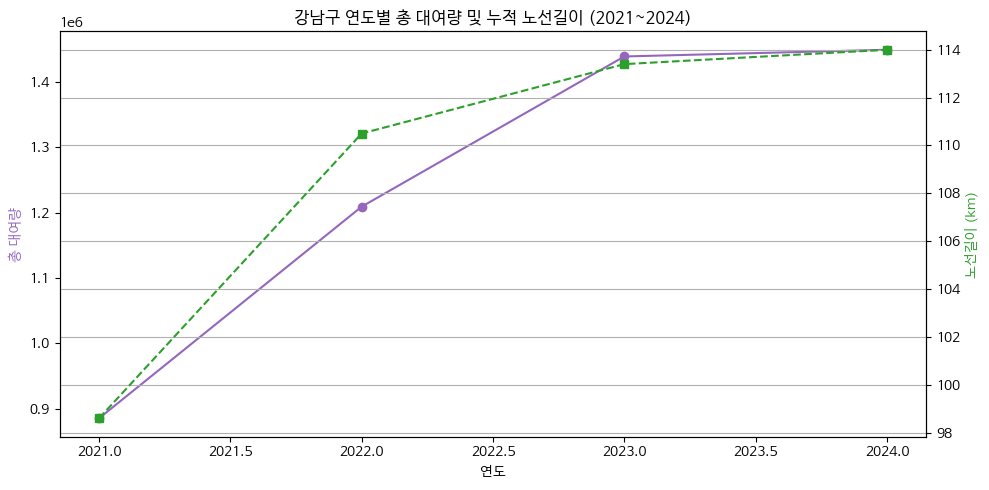

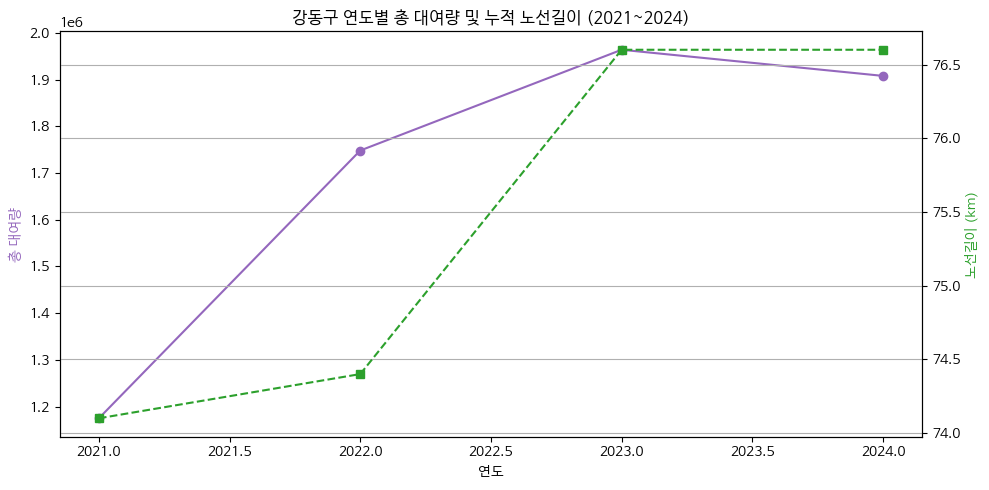

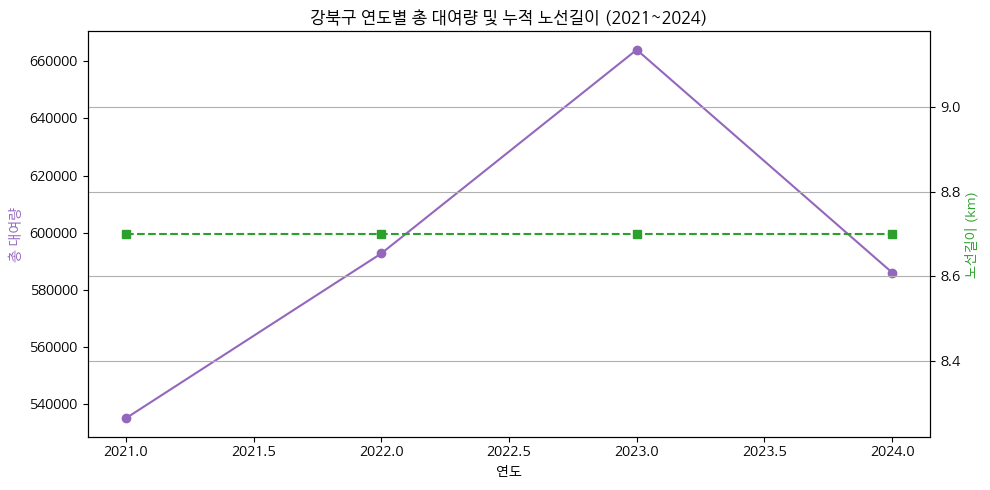

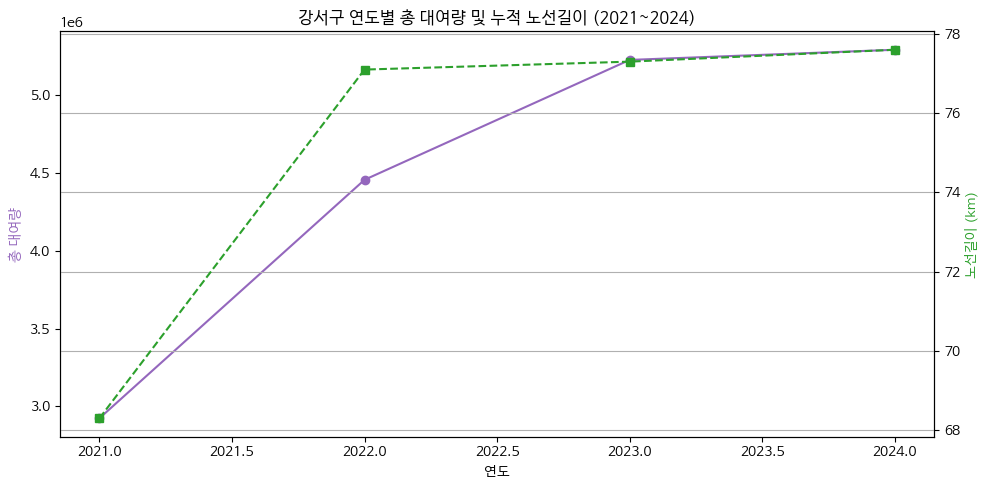

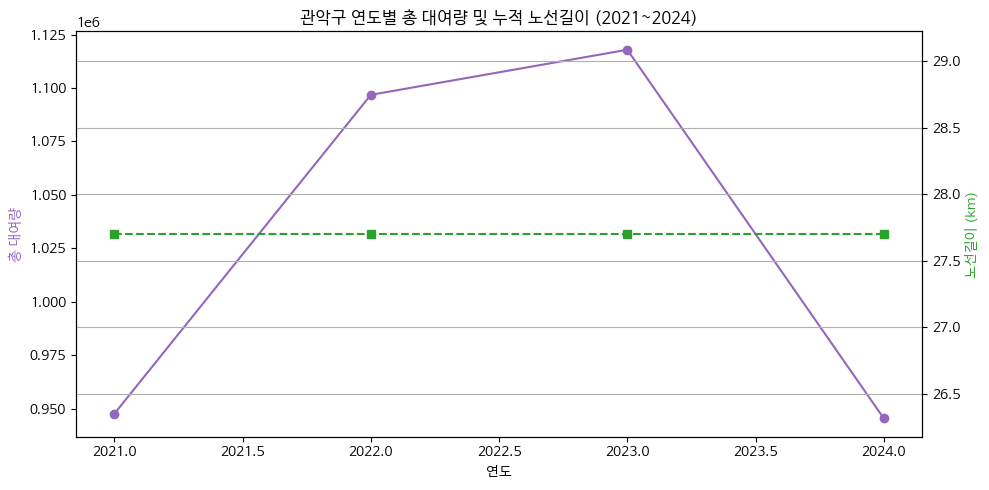

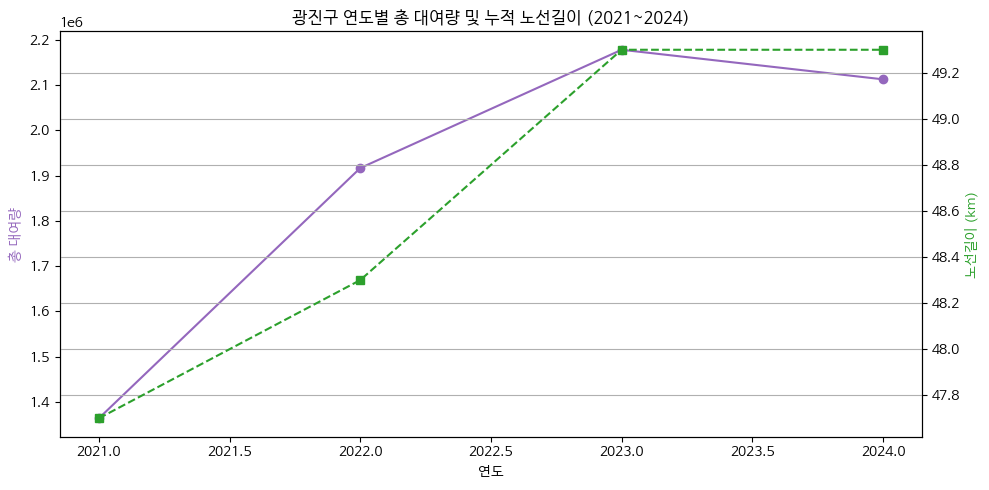

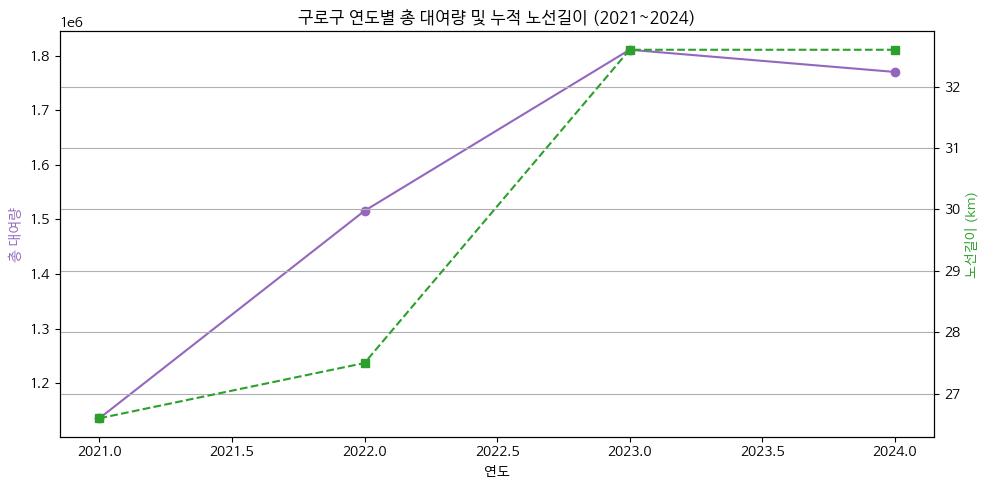

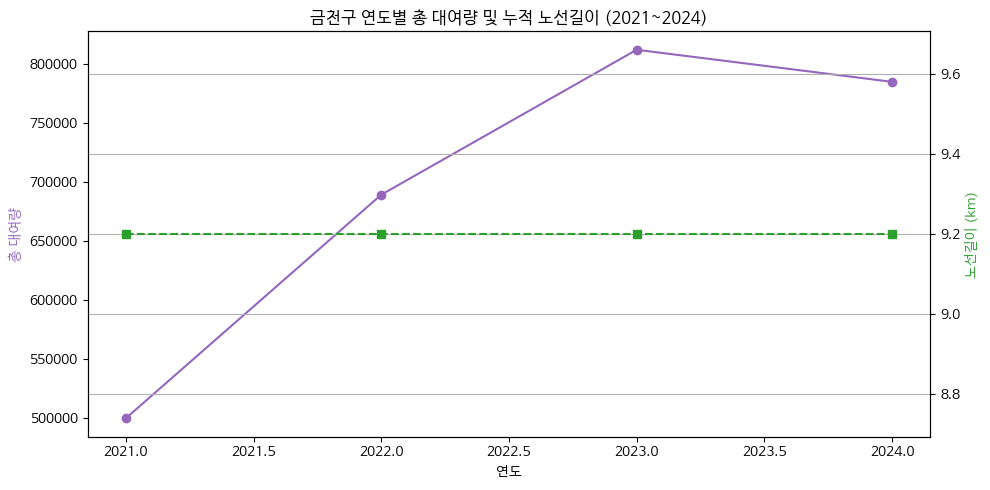

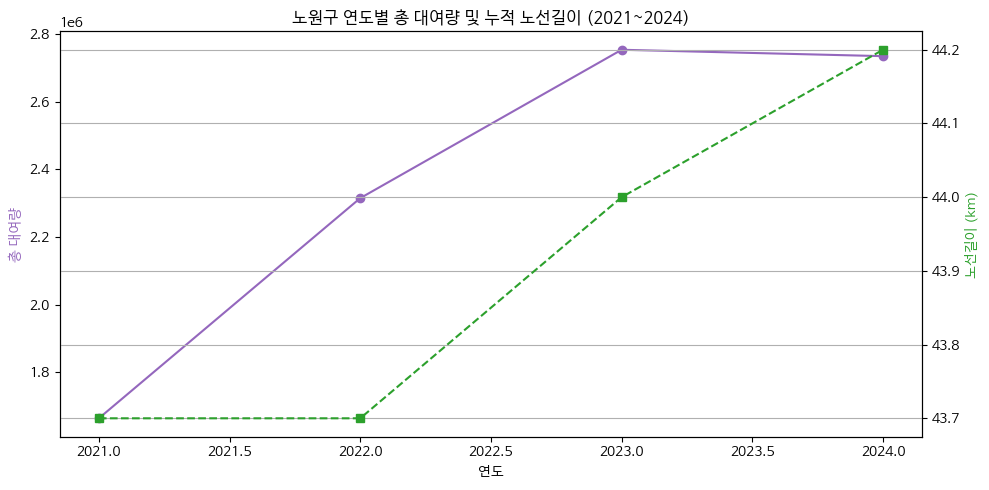

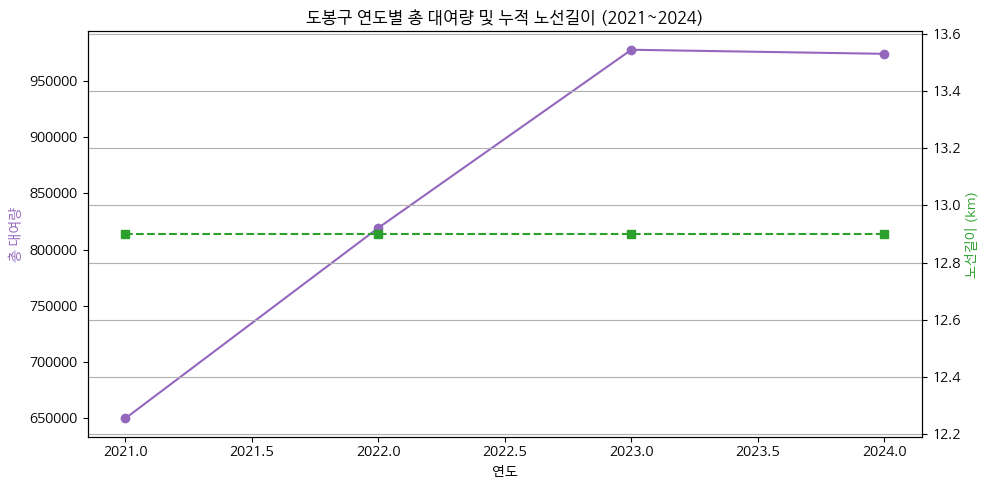

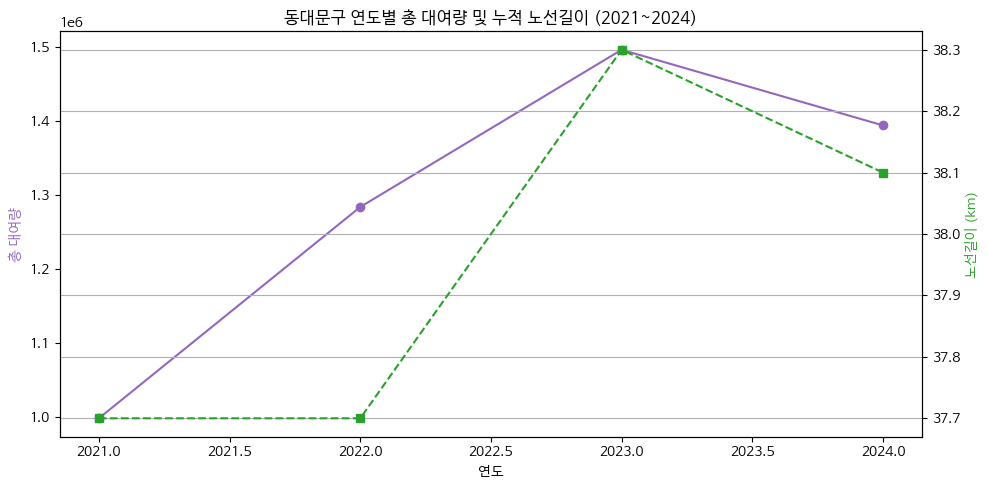

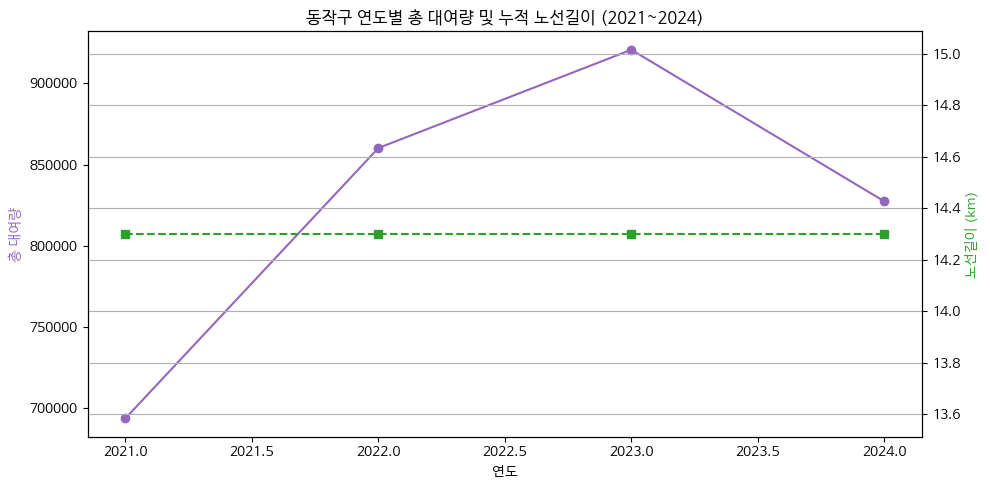

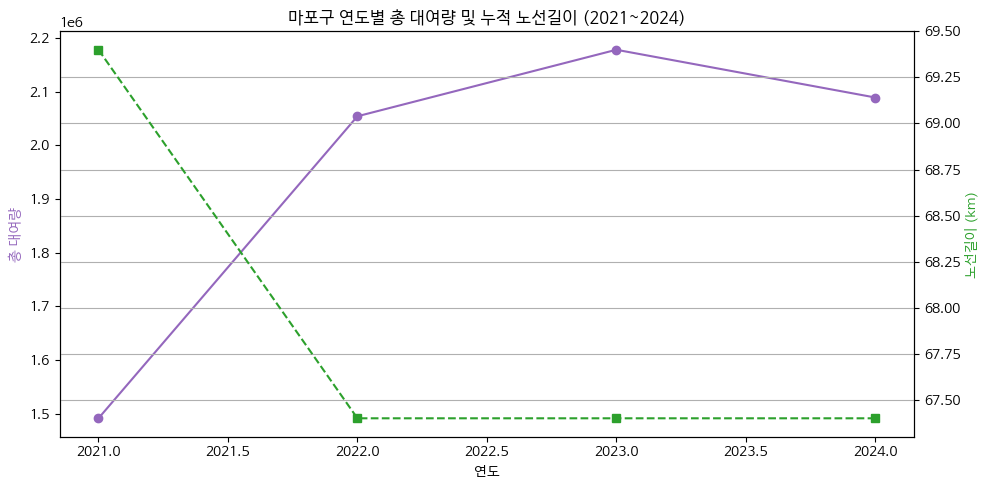

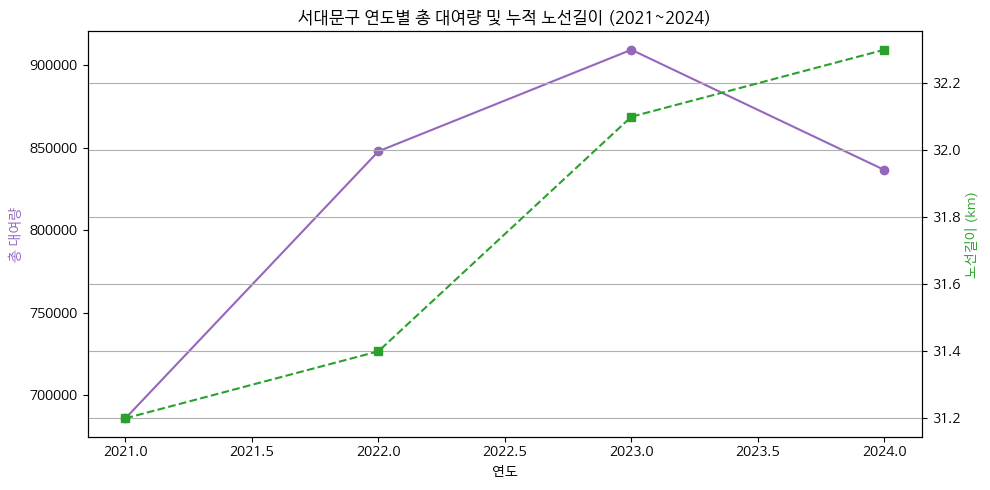

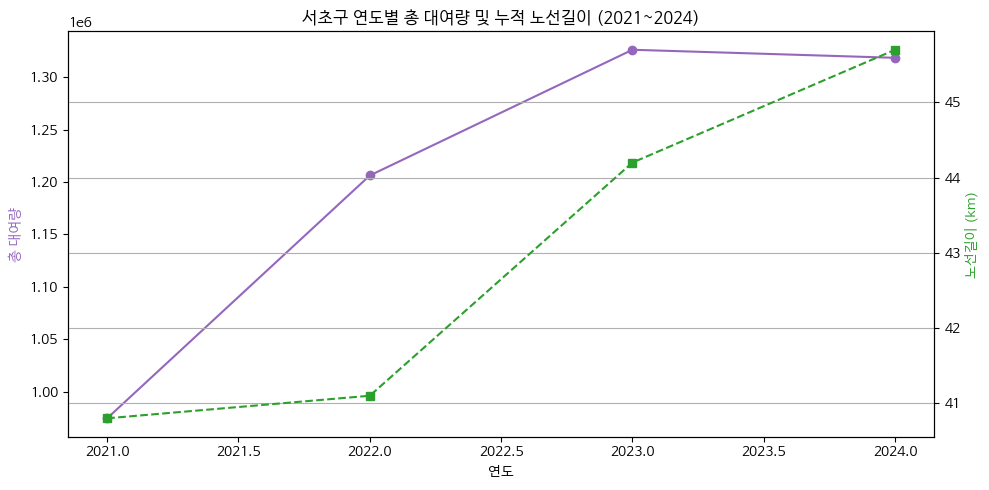

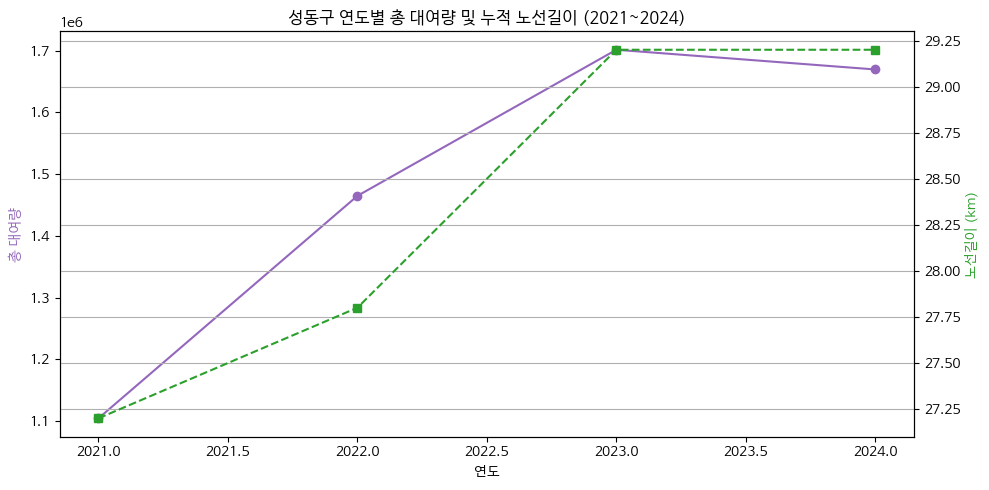

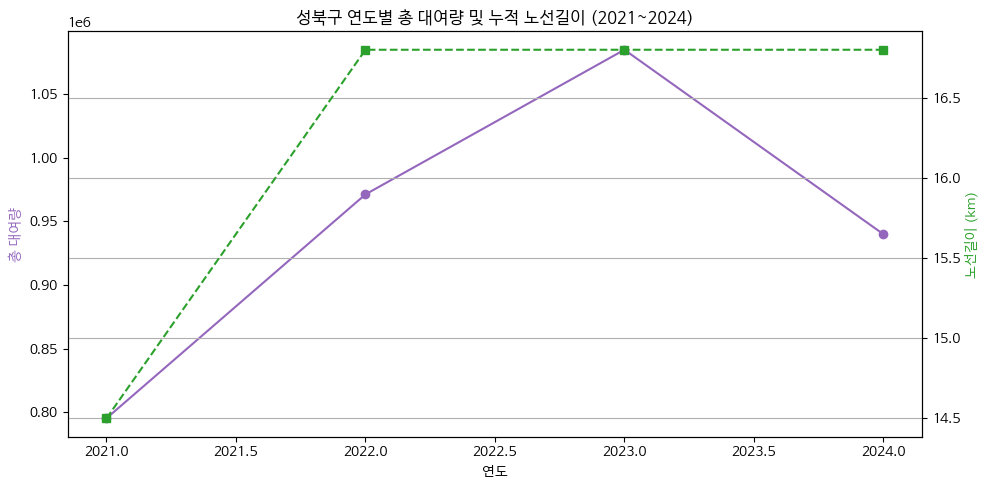

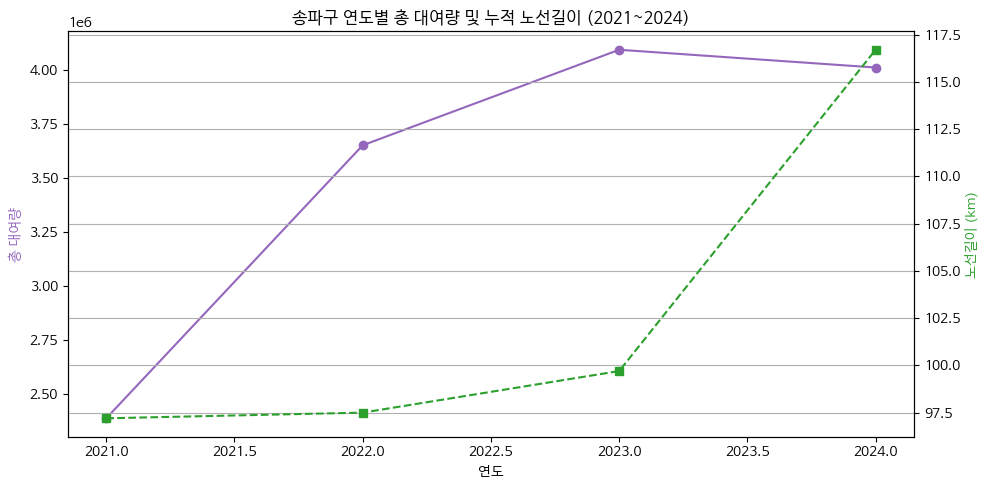

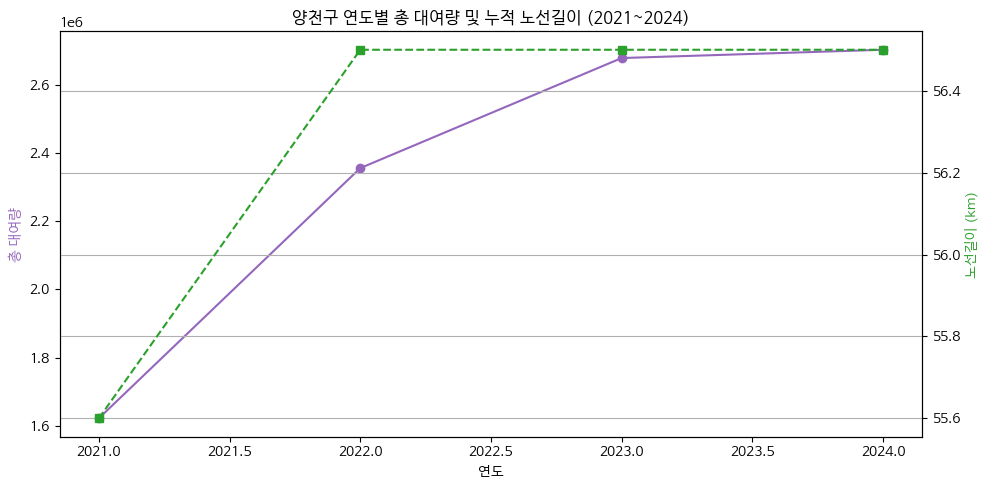

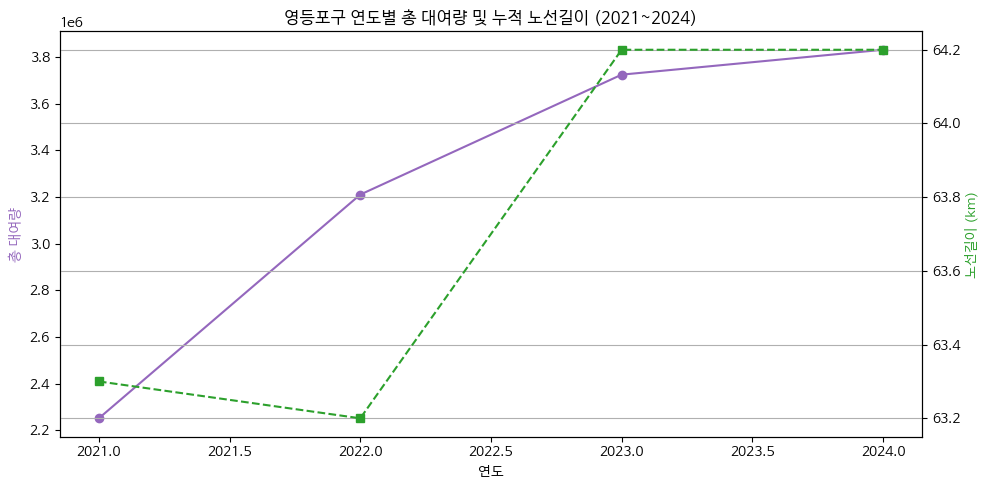

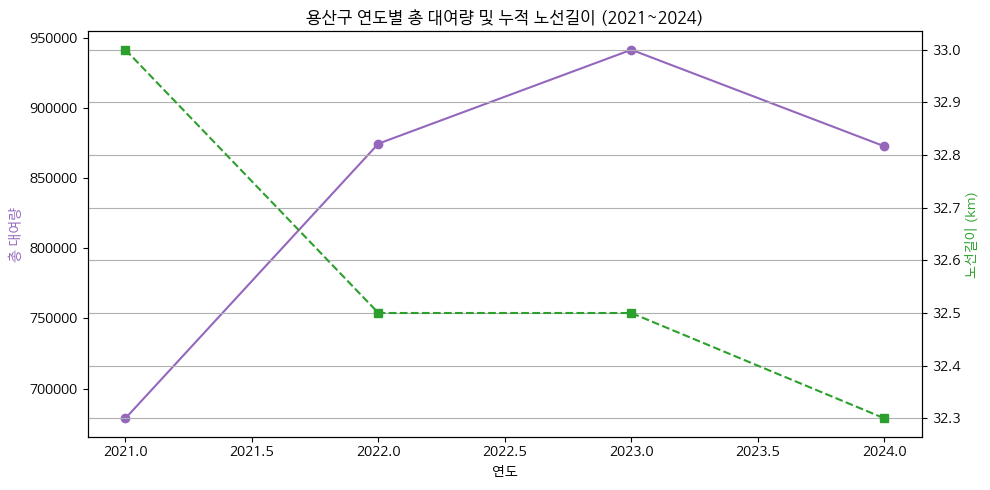

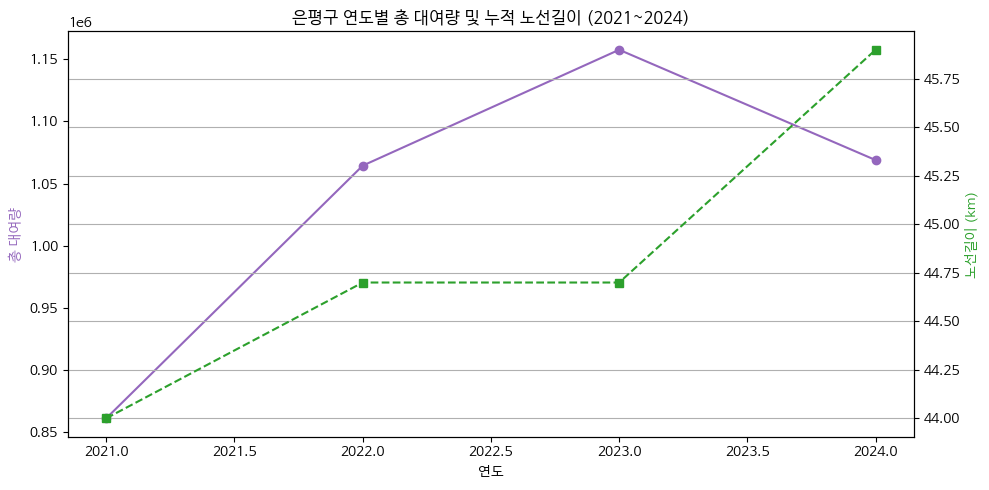

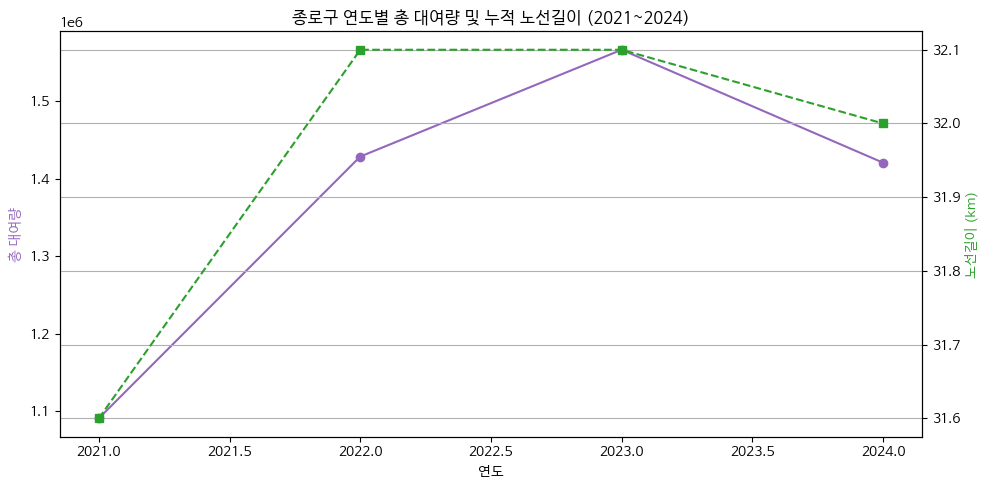

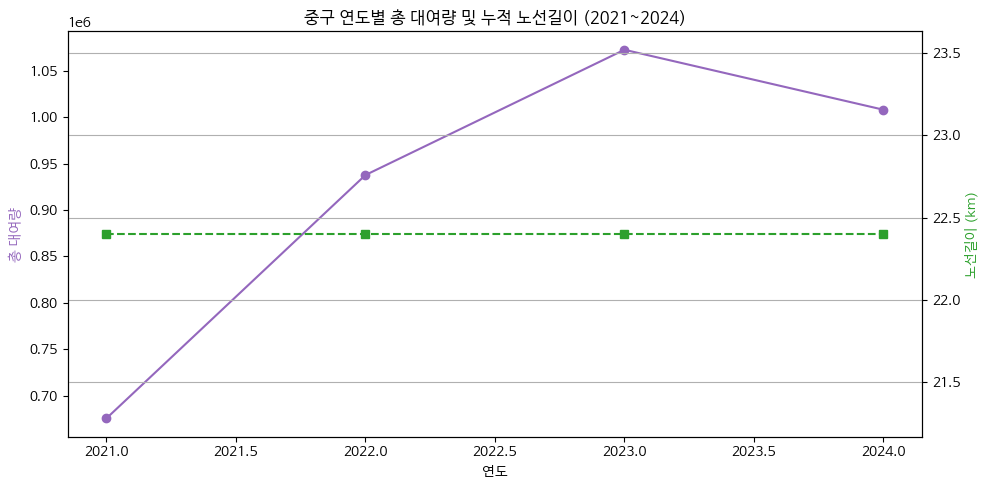

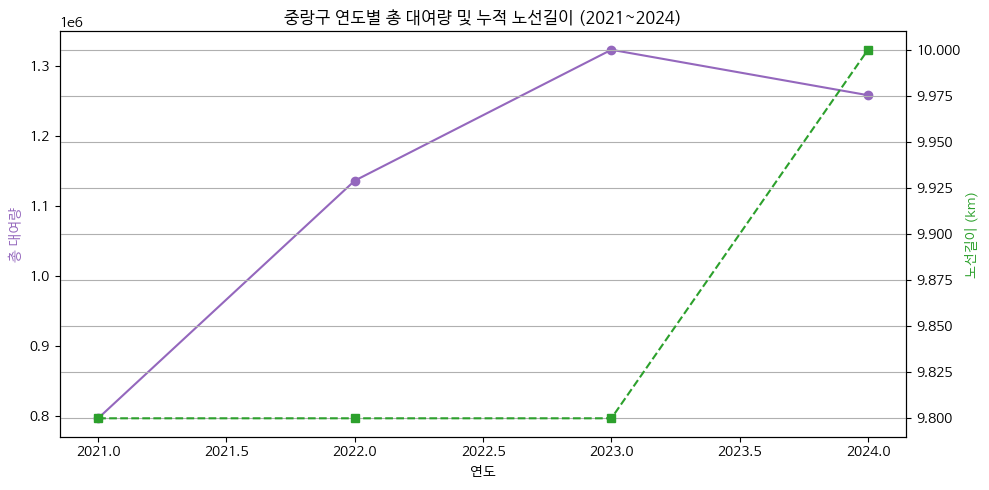

In [22]:
# 데이터 전처리
df = df_data_gu_bikeroad_rent.copy()
df['일시'] = df['일시'].astype(str).str[:10]
df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['일시'])
df['연도'] = df['일시'].dt.year

# 연도 범위 제한
df = df[df['연도'].between(2021, 2024)]

# 연도별 행정구별 총 대여량
rent_sum = df.groupby(['행정구', '연도'])['대여량'].sum().reset_index()

# 연도별 행정구별 누적 노선길이 (최댓값 기준)
length_sum = df.groupby(['행정구', '연도'])['노선길이'].max().reset_index()

# 모든 연도 포함시키기
all_years = [2021, 2022, 2023, 2024]
all_gus = rent_sum['행정구'].unique()
full_index = pd.MultiIndex.from_product([all_gus, all_years], names=['행정구', '연도'])

# 누락 보완
rent_sum = rent_sum.set_index(['행정구', '연도']).reindex(full_index).reset_index()
length_sum = length_sum.set_index(['행정구', '연도']).reindex(full_index).reset_index()

# 결측값 처리
rent_sum['대여량'] = rent_sum['대여량'].fillna(0)
length_sum['노선길이'] = length_sum['노선길이'].fillna(method='ffill')

# 병합
merged = pd.merge(rent_sum, length_sum, on=['행정구', '연도'])

# 시각화
for gu in all_gus:
    gu_data = merged[merged['행정구'] == gu]

    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()

    ax1.plot(gu_data['연도'], gu_data['대여량'], color='tab:purple', marker='o', label='대여량')
    ax2.plot(gu_data['연도'], gu_data['노선길이'], color='tab:green', marker='s', linestyle='--', label='노선길이')

    ax1.set_xlabel('연도')
    ax1.set_ylabel('총 대여량', color='tab:purple')
    ax2.set_ylabel('노선길이 (km)', color='tab:green')

    plt.title(f'{gu} 연도별 총 대여량 및 누적 노선길이 (2021~2024)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = df_data_gu_bikeroad_rent.copy()
df['일시'] = df['일시'].astype(str).str[:10]
df['일시'] = pd.to_datetime(df['일시'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['일시'])
df['연도'] = df['일시'].dt.year
df = df[df['연도'].between(2021, 2024)]

# 전체 상관계수
correlation, p_value = pearsonr(df['노선길이'], df['대여량'])
print(f'피어슨 상관계수: {correlation:.4f} (p-value={p_value:.4f})')

피어슨 상관계수: 0.3327 (p-value=0.0000)


- 상관계수가 0.7 이상이면 강한 양의 상관관계
- 0.3~0.7 사이면 약한 양의 상관관계
- 0.3 이하라면 거의 관련이 없음

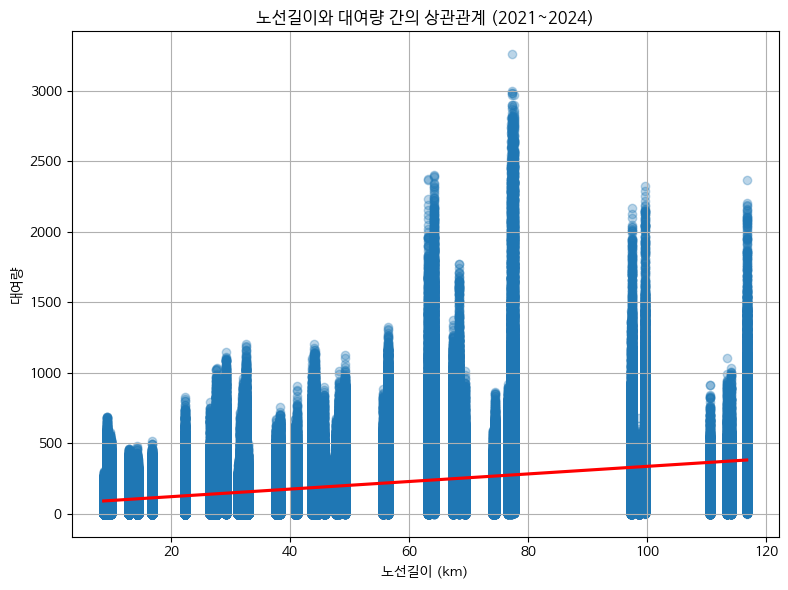

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(x='노선길이', y='대여량', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('노선길이와 대여량 간의 상관관계 (2021~2024)')
plt.xlabel('노선길이 (km)')
plt.ylabel('대여량')
plt.grid(True)
plt.tight_layout()
plt.show()

위 그래프와 상관계수를 보아 노선의 길이와 변화에 따른 대여량은 연관성이 아주 낮으며, 데이터의 정보량 자체의 부족으로 feature로 활용하기 부적합하다고 판단.
향후 모델을 만들 때 우선순위에 노선의 길이는 낮게 두고 모델 설계